In [ ]:
# 내 드라이브 mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 필요한 패키지 설치
!pip install -q tflite-model-maker

     |████████████████████████████████| 616 kB 11.9 MB/s 
     |████████████████████████████████| 3.4 MB 39.9 MB/s 
     |████████████████████████████████| 1.2 MB 34.6 MB/s 
     |████████████████████████████████| 840 kB 35.4 MB/s 
     |████████████████████████████████| 1.1 MB 42.1 MB/s 
     |████████████████████████████████| 213 kB 51.6 MB/s 
     |████████████████████████████████| 120 kB 54.8 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 87 kB 6.5 MB/s 
     |████████████████████████████████| 6.3 MB 40.8 MB/s 
     |████████████████████████████████| 1.1 MB 38.1 MB/s 
     |████████████████████████████████| 596 kB 43.9 MB/s 
     |████████████████████████████████| 25.3 MB 1.6 MB/s 
     |████████████████████████████████| 47.6 MB 83 kB/s 
     |████████████████████████████████| 99 kB 9.3 MB/s 
     |████████████████████████████████| 352 kB 43.2 MB/s 
     |████████████████████████████████| 208 kB 36.7 MB/s 


In [ ]:
# 패키지 가져오기
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [ ]:
# 훈련 데이터와 테스트 데이터 나누기
data = DataLoader.from_folder('/content/drive/MyDrive/fire images')
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 199, num_label: 2, labels: fire, non_fire.


INFO:tensorflow:Load image with size: 199, num_label: 2, labels: fire, non_fire.


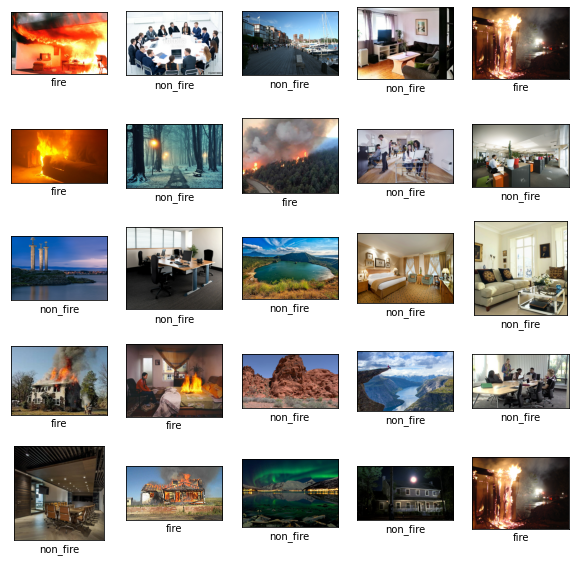

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
# tensorflow 모델 지정
model = image_classifier.create(train_data, validation_data=validation_data, batch_size=16, epochs=100)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_4 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


9/9 [==============================] - 8s 627ms/step - loss: 0.7002 - accuracy: 0.6458 - val_loss: 0.3564 - val_accuracy: 0.9000
Epoch 2/100
9/9 [==============================] - 5s 551ms/step - loss: 0.3923 - accuracy: 0.8819 - val_loss: 0.2415 - val_accuracy: 1.0000
Epoch 3/100
9/9 [==============================] - 6s 708ms/step - loss: 0.2865 - accuracy: 0.9722 - val_loss: 0.2435 - val_accuracy: 1.0000
Epoch 4/100
9/9 [==============================] - 6s 706ms/step - loss: 0.2751 - accuracy: 0.9722 - val_loss: 0.2421 - val_accuracy: 1.0000
Epoch 5/100
9/9 [==============================] - 5s 551ms/step - loss: 0.2528 - accuracy: 0.9931 - val_loss: 0.2378 - val_accuracy: 1.0000
Epoch 6/100
9/9 [==============================] - 5s 546ms/step - loss: 0.2453 - accuracy: 0.9931 - val_loss: 0.2408 - val_accuracy: 1.0000
Epoch 7/100
9/9 [==============================] - 5s 550ms/step - loss: 0.2448 - accuracy: 1.0000 - val_loss: 0.2378 - val_accuracy: 1.0000
Epoch 8/100
9/9 [========

In [ ]:
# 모델 평가
loss, accuracy = model.evaluate(test_data)

1/1 [==============================] - 2s 2s/step - loss: 0.3741 - accuracy: 0.9000


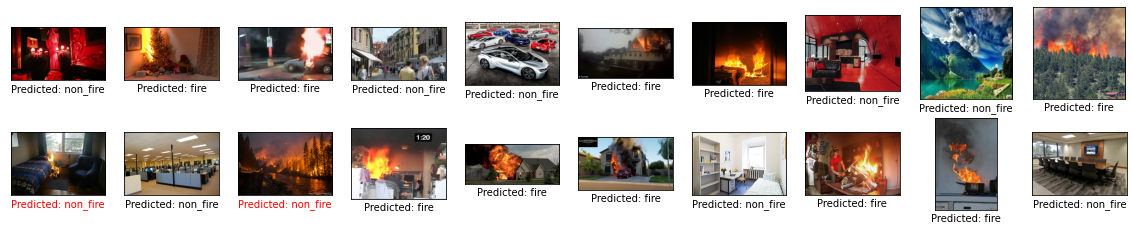

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()